Select a dataset of interest and clearly state the classification task. Specifically, describe a business problem that could be solved using the dataset and a KNN classification model. Further, identify what you believe to be the appropriate metric and justify your choice. Build a basic model with the KNearestNeighbor and grid search to optimize towards your chosen metric. Share your results with your peers.

Dataset: The dataset contains the sign and symptom data of newly diabetic or would be diabetic patient.
Task: Classify and identify patients at highest risk of early stage diabetes. 
Business Case: If early stage diabetis can be detected early then patients can implement lifestyle changes and undergo preventative care thereby reducing risk of death and future healthcare costs. An app could be develped that allows patients and thier doctors to monitor this risk.

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import recall_score
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [72]:
df = pd.read_csv('data/diabetes.csv')

In [74]:
df.head(2)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive


In [76]:
# Check for missing (NaN) values in the dataset
missing_values = df.isna().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


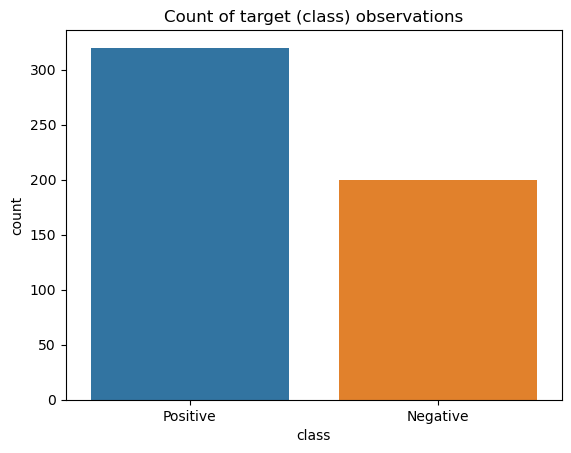

In [78]:
sns.countplot(data=df, x = 'class')
plt.title('Count of target (class) observations');

#### Build Column Transformer

In [34]:
# Define the columns for categorical and numerical features
categorical_columns = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 
                       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 
                       'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
numerical_columns = ['Age']

# Function to apply Label Encoding on the categorical features
def label_encode(df):
    for col in categorical_columns:
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

# Create a transformer that applies label encoding and scaling
transformer = make_column_transformer(
    (FunctionTransformer(func=label_encode, validate=False), categorical_columns),  # Label encoding
    (StandardScaler(), numerical_columns),  # Scaling the numerical features
    remainder='passthrough'  # Pass through other columns, if any
)

In [50]:
X = df.drop(columns='class')
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [66]:
pipe = Pipeline([
    ('transformer', transformer),
    ('knn', KNeighborsClassifier())
])

In [68]:
param_grid = {
    'knn__n_neighbors': list(range(1, 22, 2))
}

grid_search = GridSearchCV(pipe, param_grid=param_grid, scoring='recall', cv=StratifiedKFold(n_splits=5))

grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best n_neighbors: {grid_search.best_params_}')
print(f'Best recall score: {grid_search.best_score_:.2f}')

Best n_neighbors: {'knn__n_neighbors': 1}
Best recall score: nan
